In [1]:
import numpy as np
from pandas import DataFrame as DF
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pi = np.pi
log = np.log
exp = np.exp
sin = np.sin
sinh = np.sinh
tan = np.tan
tanh = np.tanh
arctan = np.arctan
arctanh = np.arctanh

# Chapter 6<br>Ordinary Differential Equations

## 6.2 Analysis of IVP Solvers

In [3]:
def Euler_method(f, a, b, h, y_0):
    n = int((b - a)/h)
    t = np.linspace(a, b, n+1)
    w = np.zeros(n+1)
    w[0] = y_0
    
    for i in range(n):
        w[i+1] = w[i] + h*f(t[i], w[i])
        
    return t, w

In [4]:
def Explicit_trapezoid_method(f, a, b, h, y_0):
    n = int((b - a)/h)
    t = np.linspace(a, b, n+1)
    w = np.zeros(n+1)
    w[0] = y_0
    
    for i in range(n):
        w[i+1] = w[i] + (f(t[i], w[i]) + f(t[i] + h, w[i] + h*f(t[i], w[i])))*(h/2)
        
    return t, w

In [5]:
def Taylor_method_2_order(f, f_diff_1, a, b, h, y_0):
    n = int((b - a)/h)
    t = np.linspace(a, b, n+1)
    w = np.zeros(n+1)
    w[0] = y_0
    
    for i in range(n):
        w[i+1] = w[i] + h*f(t[i], w[i]) + (0.5 * h**2)*f_diff_1(t[i], w[i])
        
    return t, w

### Q. 1

In [6]:
a, b = 0, 1
h = 0.1
t_list = np.linspace(0, 1, 11)
y_0 = 1

In [7]:
# (a)
def f(t, y):
    return t

def exact_sol(t):
    return (t**2)/2 + 1

In [8]:
true_value = exact_sol(t_list)
t, w = Explicit_trapezoid_method(f, a, b, h, y_0)
global_error = abs(true_value - w)

DF({"Approximations": w, "Global truncation error": global_error, 't =': t}).set_index('t =')

,Approximations,Global truncation error
t =,,
0.0,1.000,0.000000e+00
0.1,1.005,0.000000e+00
0.2,1.020,2.220446e-16
0.3,1.045,2.220446e-16
0.4,1.080,4.440892e-16
0.5,1.125,4.440892e-16
0.6,1.180,6.661338e-16
0.7,1.245,6.661338e-16
0.8,1.320,6.661338e-16


In [9]:
# (b)
def f(t, y):
    return (t**2)*y

def exact_sol(t):
    return exp((t**3)/3)

In [10]:
true_value = exact_sol(t_list)
t, w = Explicit_trapezoid_method(f, a, b, h, y_0)
global_error = abs(true_value - w)

DF({"Approximations": w, "Global truncation error": global_error, 't =': t}).set_index('t =')

,Approximations,Global truncation error
t =,,
0.0,1.000000,0.000000
0.1,1.000500,0.000167
0.2,1.003003,0.000333
0.3,1.009541,0.000500
0.4,1.022233,0.000670
0.5,1.043393,0.000846
0.6,1.075686,0.001031
0.7,1.122351,0.001226
0.8,1.187524,0.001429


In [11]:
# (c)
def f(t, y):
    return 2*(t + 1)*y

def exact_sol(t):
    return exp((t+1)**2 - 1)

In [12]:
true_value = exact_sol(t_list)
t, w = Explicit_trapezoid_method(f, a, b, h, y_0)
global_error = abs(true_value - w)

DF({"Approximations": w, "Global truncation error": global_error, 't =': t}).set_index('t =')

,Approximations,Global truncation error
t =,,
0.0,1.000000,0.000000
0.1,1.232000,0.001678
0.2,1.547885,0.004822
0.3,1.983150,0.010566
0.4,2.590787,0.020909
0.5,3.450929,0.039414
0.6,4.686361,0.072460
0.7,6.487798,0.131571
0.8,9.155581,0.237751


In [13]:
# (d)
def f(t, y):
    return 5*(t**4)*y

def exact_sol(t):
    return exp(t**5)

In [14]:
true_value = exact_sol(t_list)
t, w = Explicit_trapezoid_method(f, a, b, h, y_0)
global_error = abs(true_value - w)

DF({"Approximations": w, "Global truncation error": global_error, 't =': t}).set_index('t =')

,Approximations,Global truncation error
t =,,
0.0,1.000000,0.000000
0.1,1.000025,0.000015
0.2,1.000450,0.000130
0.3,1.002878,0.000445
0.4,1.011353,0.001060
0.5,1.033830,0.002087
0.6,1.084527,0.003664
0.7,1.188983,0.005963
0.8,1.396719,0.008975


In [15]:
# (e)
def f(t, y):
    return y**(-2)

def exact_sol(t):
    return (3*t + 1)**(1/3)

In [16]:
true_value = exact_sol(t_list)
t, w = Explicit_trapezoid_method(f, a, b, h, y_0)
global_error = abs(true_value - w)

DF({"Approximations": w, "Global truncation error": global_error, 't =': t}).set_index('t =')

,Approximations,Global truncation error
t =,,
0.0,1.000000,0.000000
0.1,1.091322,0.000071
0.2,1.169502,0.000105
0.3,1.238440,0.000122
0.4,1.300461,0.000130
0.5,1.357075,0.000133
0.6,1.409326,0.000134
0.7,1.457966,0.000133
0.8,1.503563,0.000132


In [17]:
# (f)
def f(t, y):
    return t**3 / y**2

def exact_sol(t):
    return (0.75*(t**4) + 1)**(1/3)

In [18]:
true_value = exact_sol(t_list)
t, w = Explicit_trapezoid_method(f, a, b, h, y_0)
global_error = abs(true_value - w)

DF({"Approximations": w, "Global truncation error": global_error, 't =': t}).set_index('t =')

,Approximations,Global truncation error
t =,,
0.0,1.000000,0.000000
0.1,1.000050,0.000025
0.2,1.000500,0.000100
0.3,1.002246,0.000225
0.4,1.006759,0.000399
0.5,1.016006,0.000618
0.6,1.032278,0.000874
0.7,1.057893,0.001149
0.8,1.094822,0.001418


### Q. 2

In [19]:
a, b = 0, 1
h_list = [0.1, 0.05, 0.025]
t_list = np.linspace(0, 1, 41)
y_0 = 1

In [20]:
# (a)
def f(t, y):
    return t

def exact_sol(t):
    return (t**2)/2 + 1

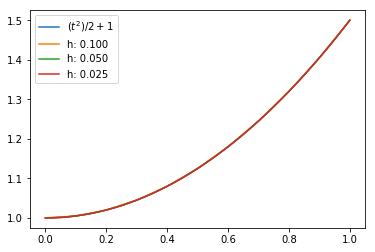

In [21]:
plt.figure()

true_value = exact_sol(t_list)
plt.plot(t_list, true_value, label='$(t^2)/2 + 1$')

for h in h_list:
    t, w = Explicit_trapezoid_method(f, a, b, h, y_0)
    plt.plot(t, w, label='h: %.3f' % h)
    
plt.legend()
plt.show()

In [22]:
# (b)
def f(t, y):
    return (t**2)*y

def exact_sol(t):
    return exp((t**3)/3)

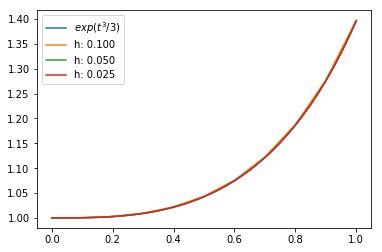

In [23]:
plt.figure()

true_value = exact_sol(t_list)
plt.plot(t_list, true_value, label='$exp(t^3/3)$')

for h in h_list:
    t, w = Explicit_trapezoid_method(f, a, b, h, y_0)
    plt.plot(t, w, label='h: %.3f' % h)
    
plt.legend()
plt.show()

In [24]:
# (c)
def f(t, y):
    return 2*(t + 1)*y

def exact_sol(t):
    return exp((t+1)**2 - 1)

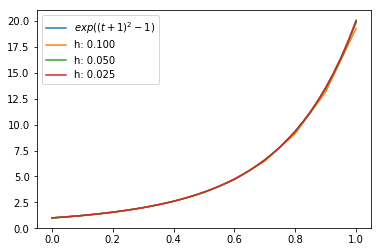

In [25]:
plt.figure()

true_value = exact_sol(t_list)
plt.plot(t_list, true_value, label='$exp((t+1)^2 - 1)$')

for h in h_list:
    t, w = Explicit_trapezoid_method(f, a, b, h, y_0)
    plt.plot(t, w, label='h: %.3f' % h)
    
plt.legend()
plt.show()

In [26]:
# (d)
def f(t, y):
    return 5*(t**4)*y

def exact_sol(t):
    return exp(t**5)

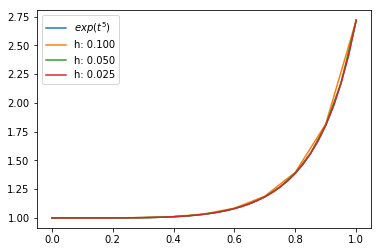

In [27]:
plt.figure()

true_value = exact_sol(t_list)
plt.plot(t_list, true_value, label='$exp(t^5)$')

for h in h_list:
    t, w = Explicit_trapezoid_method(f, a, b, h, y_0)
    plt.plot(t, w, label='h: %.3f' % h)
    
plt.legend()
plt.show()

In [28]:
# (e)
def f(t, y):
    return y**(-2)

def exact_sol(t):
    return (3*t + 1)**(1/3)

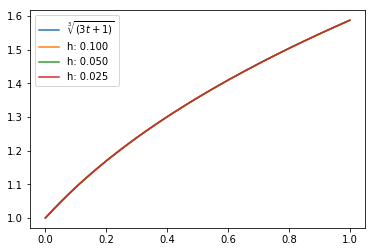

In [29]:
plt.figure()

true_value = exact_sol(t_list)
plt.plot(t_list, true_value, label='$\sqrt[3]{(3t + 1)}$')

for h in h_list:
    t, w = Explicit_trapezoid_method(f, a, b, h, y_0)
    plt.plot(t, w, label='h: %.3f' % h)
    
plt.legend()
plt.show()

In [30]:
# (f)
def f(t, y):
    return t**3 / y**2

def exact_sol(t):
    return (0.75*(t**4) + 1)**(1/3)

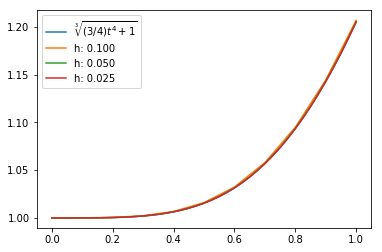

In [31]:
plt.figure()

true_value = exact_sol(t_list)
plt.plot(t_list, true_value, label='$\sqrt[3]{(3/4)t^4 + 1}$')

for h in h_list:
    t, w = Explicit_trapezoid_method(f, a, b, h, y_0)
    plt.plot(t, w, label='h: %.3f' % h)
    
plt.legend()
plt.show()

### Q. 3

In [32]:
a, b = 0, 1
h_list = [0.1*(2**(-k)) for k in range(6)]
y_0 = 1

In [33]:
# (a)
def f(t, y):
    return t

def exact_sol(t):
    return (t**2)/2 + 1

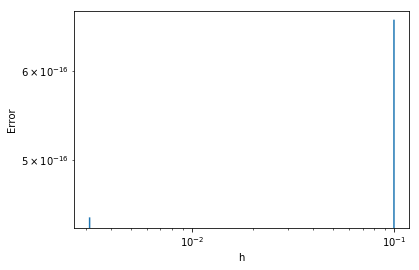

In [34]:
f_1 = exact_sol(1)
error_list = np.zeros(6)
for i, h in enumerate(h_list):
    t, w = Explicit_trapezoid_method(f, a, b, h, y_0)
    error_list[i] = abs(w[-1] - f_1)

plt.plot(h_list, error_list)
plt.xlabel('h')
plt.ylabel("Error")
plt.xscale("log")
plt.yscale("log")
plt.show()

In [35]:
# (b)
def f(t, y):
    return (t**2)*y

def exact_sol(t):
    return exp((t**3)/3)

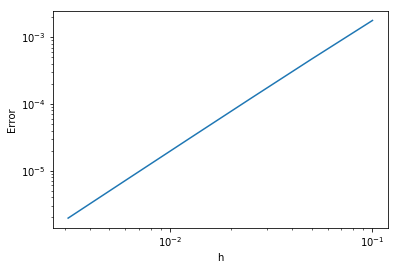

In [36]:
f_1 = exact_sol(1)
error_list = np.zeros(6)
for i, h in enumerate(h_list):
    t, w = Explicit_trapezoid_method(f, a, b, h, y_0)
    error_list[i] = abs(w[-1] - f_1)

plt.plot(h_list, error_list)
plt.xlabel('h')
plt.ylabel("Error")
plt.xscale("log")
plt.yscale("log")
plt.show()

In [37]:
# (c)
def f(t, y):
    return 2*(t + 1)*y

def exact_sol(t):
    return exp((t+1)**2 - 1)

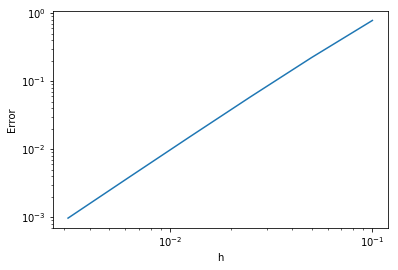

In [38]:
f_1 = exact_sol(1)
error_list = np.zeros(6)
for i, h in enumerate(h_list):
    t, w = Explicit_trapezoid_method(f, a, b, h, y_0)
    error_list[i] = abs(w[-1] - f_1)

plt.plot(h_list, error_list)
plt.xlabel('h')
plt.ylabel("Error")
plt.xscale("log")
plt.yscale("log")
plt.show()

In [39]:
# (d)
def f(t, y):
    return 5*(t**4)*y

def exact_sol(t):
    return exp(t**5)

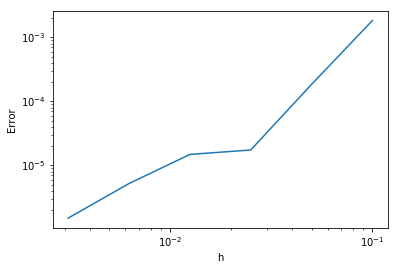

In [40]:
f_1 = exact_sol(1)
error_list = np.zeros(6)
for i, h in enumerate(h_list):
    t, w = Explicit_trapezoid_method(f, a, b, h, y_0)
    error_list[i] = abs(w[-1] - f_1)

plt.plot(h_list, error_list)
plt.xlabel('h')
plt.ylabel("Error")
plt.xscale("log")
plt.yscale("log")
plt.show()

In [41]:
# (e)
def f(t, y):
    return y**(-2)

def exact_sol(t):
    return (3*t + 1)**(1/3)

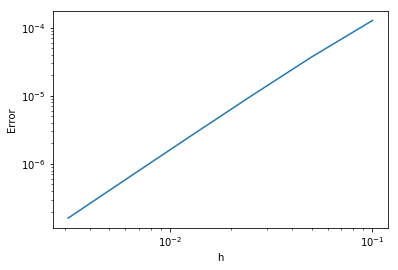

In [42]:
f_1 = exact_sol(1)
error_list = np.zeros(6)
for i, h in enumerate(h_list):
    t, w = Explicit_trapezoid_method(f, a, b, h, y_0)
    error_list[i] = abs(w[-1] - f_1)

plt.plot(h_list, error_list)
plt.xlabel('h')
plt.ylabel("Error")
plt.xscale("log")
plt.yscale("log")
plt.show()

In [43]:
# (f)
def f(t, y):
    return t**3 / y**2

def exact_sol(t):
    return (0.75*(t**4) + 1)**(1/3)

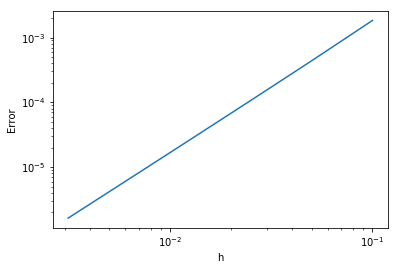

In [44]:
f_1 = exact_sol(1)
error_list = np.zeros(6)
for i, h in enumerate(h_list):
    t, w = Explicit_trapezoid_method(f, a, b, h, y_0)
    error_list[i] = abs(w[-1] - f_1)

plt.plot(h_list, error_list)
plt.xlabel('h')
plt.ylabel("Error")
plt.xscale("log")
plt.yscale("log")
plt.show()

### Q. 4

In [45]:
a, b = 0, 1
h_list = [0.1*(2**(-k)) for k in range(6)]
y_0 = 1

In [46]:
# (a)
def f(t, y):
    return t

def f_diff_1(t, y):
    return 1

def exact_sol(t):
    return (t**2)/2 + 1

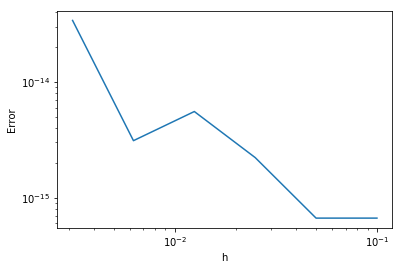

In [47]:
f_1 = exact_sol(1)
error_list = np.zeros(6)
for i, h in enumerate(h_list):
    t, w = Taylor_method_2_order(f, f_diff_1, a, b, h, y_0)
    error_list[i] = abs(w[-1] - f_1)

plt.plot(h_list, error_list)
plt.xlabel('h')
plt.ylabel("Error")
plt.xscale("log")
plt.yscale("log")
plt.show()

In [48]:
# (b)
def f(t, y):
    return (t**2)*y

def f_diff_1(t, y):
    return 2*t*y + y*t**4

def exact_sol(t):
    return exp((t**3)/3)

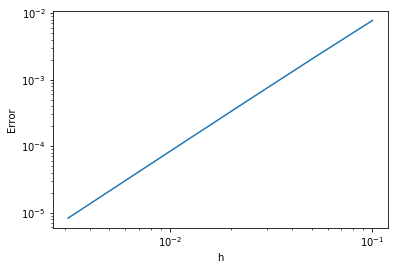

In [49]:
f_1 = exact_sol(1)
error_list = np.zeros(6)
for i, h in enumerate(h_list):
    t, w = Taylor_method_2_order(f, f_diff_1, a, b, h, y_0)
    error_list[i] = abs(w[-1] - f_1)

plt.plot(h_list, error_list)
plt.xlabel('h')
plt.ylabel("Error")
plt.xscale("log")
plt.yscale("log")
plt.show()

In [50]:
# (c)
def f(t, y):
    return 2*(t + 1)*y

def f_diff_1(t, y):
    return 2*y + 4*(t+1)**2*y

def exact_sol(t):
    return exp((t+1)**2 - 1)

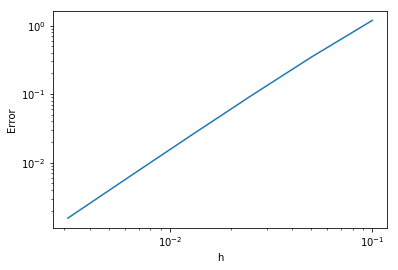

In [51]:
f_1 = exact_sol(1)
error_list = np.zeros(6)
for i, h in enumerate(h_list):
    t, w = Taylor_method_2_order(f, f_diff_1, a, b, h, y_0)
    error_list[i] = abs(w[-1] - f_1)

plt.plot(h_list, error_list)
plt.xlabel('h')
plt.ylabel("Error")
plt.xscale("log")
plt.yscale("log")
plt.show()

In [52]:
# (d)
def f(t, y):
    return 5*(t**4)*y

def f_diff_1(t, y):
    return 20*y*t**3 + 25*y*t**8

def exact_sol(t):
    return exp(t**5)

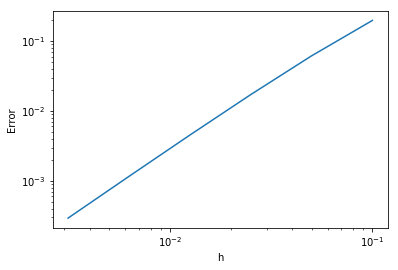

In [53]:
f_1 = exact_sol(1)
error_list = np.zeros(6)
for i, h in enumerate(h_list):
    t, w = Taylor_method_2_order(f, f_diff_1, a, b, h, y_0)
    error_list[i] = abs(w[-1] - f_1)

plt.plot(h_list, error_list)
plt.xlabel('h')
plt.ylabel("Error")
plt.xscale("log")
plt.yscale("log")
plt.show()

In [54]:
# (e)
def f(t, y):
    return y**(-2)

def f_diff_1(t, y):
    return -2*y**(-5)

def exact_sol(t):
    return (3*t + 1)**(1/3)

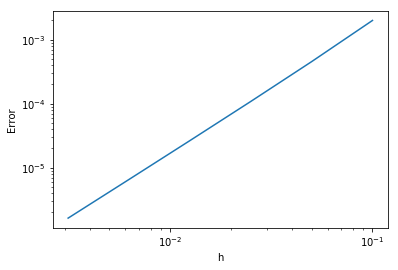

In [55]:
f_1 = exact_sol(1)
error_list = np.zeros(6)
for i, h in enumerate(h_list):
    t, w = Taylor_method_2_order(f, f_diff_1, a, b, h, y_0)
    error_list[i] = abs(w[-1] - f_1)

plt.plot(h_list, error_list)
plt.xlabel('h')
plt.ylabel("Error")
plt.xscale("log")
plt.yscale("log")
plt.show()

In [56]:
# (f)
def f(t, y):
    return t**3 / y**2

def f_diff_1(t ,y):
    return 3*(t**2)*(y**(-2)) - 2*(t**6)*(y**(-5))
    
def exact_sol(t):
    return (0.75*(t**4) + 1)**(1/3)

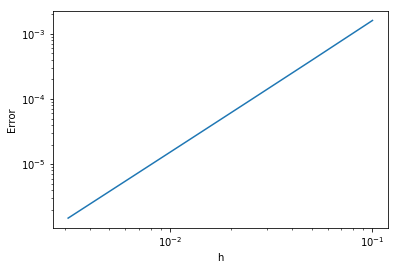

In [57]:
f_1 = exact_sol(1)
error_list = np.zeros(6)
for i, h in enumerate(h_list):
    t, w = Taylor_method_2_order(f, f_diff_1, a, b, h, y_0)
    error_list[i] = abs(w[-1] - f_1)

plt.plot(h_list, error_list)
plt.xlabel('h')
plt.ylabel("Error")
plt.xscale("log")
plt.yscale("log")
plt.show()

### Q. 5

In [58]:
a, b = 0, 1
h_list = [0.1, 0.05]
t_list = np.linspace(0, 1, 21)

def f(t, y):
    return 1 + y**2

In [59]:
# (a)
y_0 = 0

def exact_sol(t):
    return tan(t)

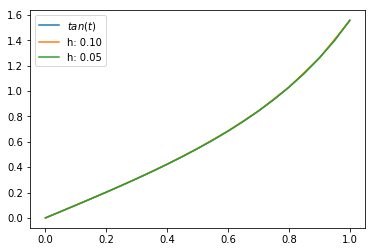

In [60]:
plt.figure()

true_value = exact_sol(t_list)
plt.plot(t_list, true_value, label='$tan(t)$')

for h in h_list:
    t, w = Explicit_trapezoid_method(f, a, b, h, y_0)
    plt.plot(t, w, label='h: %.2f' % h)
    
plt.legend()
plt.show()

In [61]:
# (b)
y_0 = 1

def exact_sol(t):
    return tan(t + pi/4)

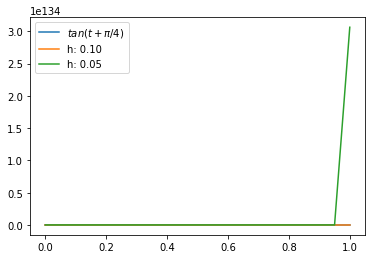

In [62]:
plt.figure()

true_value = exact_sol(t_list)
plt.plot(t_list, true_value, label='$tan(t + \pi/4)$')

for h in h_list:
    t, w = Explicit_trapezoid_method(f, a, b, h, y_0)
    plt.plot(t, w, label='h: %.2f' % h)
    
plt.legend()
plt.show()

### Q. 6

In [63]:
a, b = 0, 1
h_list = [0.1, 0.05]
t_list = np.linspace(0, 1, 21)

def f(t, y):
    return 1 - y**2

In [64]:
# (a)
y_0 = 0

def exact_sol(t):
    return tanh(t)

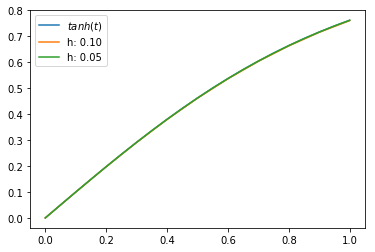

In [65]:
plt.figure()

true_value = exact_sol(t_list)
plt.plot(t_list, true_value, label='$tanh(t)$')

for h in h_list:
    t, w = Explicit_trapezoid_method(f, a, b, h, y_0)
    plt.plot(t, w, label='h: %.2f' % h)
    
plt.legend()
plt.show()

In [66]:
# (b)
y_0 = -1/2

def exact_sol(t):
    c = -log(3)/2
    return tanh(t + c)

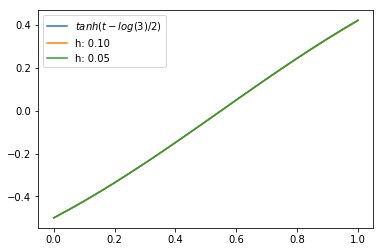

In [67]:
plt.figure()

true_value = exact_sol(t_list)
plt.plot(t_list, true_value, label='$tanh(t - log(3)/2)$')

for h in h_list:
    t, w = Explicit_trapezoid_method(f, a, b, h, y_0)
    plt.plot(t, w, label='h: %.2f' % h)
    
plt.legend()
plt.show()

### Q. 7

In [68]:
a, b = 0, 4
h_list = [0.1 * 2**(-k) for k in range(6)]
t_list = np.arange(a, b+h_list[-1], h_list[-1])

def f(t, y):
    return sin(y)

In [69]:
# (a)
y_0 = 0

def exact_sol(t):
    return 2*arctan(exp(t)*tan(y_0/2)) + 2*pi*int((y_0 + pi)/(2*pi))

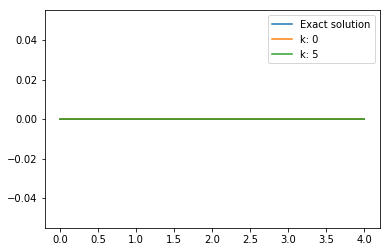

In [70]:
plt.figure()

true_value = exact_sol(t_list)
plt.plot(t_list, true_value, label='Exact solution')

for i, h in enumerate([h_list[0], h_list[-1]]):
    t, w = Explicit_trapezoid_method(f, a, b, h, y_0)
    plt.plot(t, w, label='k: %d' % (5*i))
    
plt.legend()
plt.show()

C:\Users\snuist\Anaconda3\lib\site-packages\matplotlib\ticker.py:2206: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


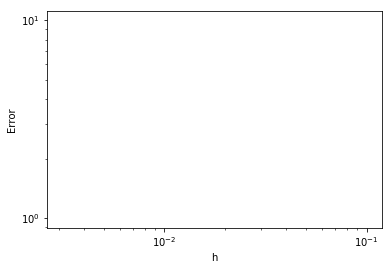

In [71]:
f_4 = exact_sol(4)
error_list = np.zeros(6)
for i, h in enumerate(h_list):
    t, w = Explicit_trapezoid_method(f, a, b, h, y_0)
    error_list[i] = abs(w[-1] - f_4)
# Since the initial value is 0, the solution of the ODE is 0.
# Therefore the Explicit_trapezoid method can precisely calculate the result.
    
plt.plot(h_list, error_list)
plt.xlabel('h')
plt.ylabel("Error")
plt.xscale("log")
plt.yscale("log")
plt.show()

In [72]:
# (b)
y_0 = 100

def exact_sol(t):
    return 2*arctan(exp(t)*tan(y_0/2)) + 2*pi*int((y_0 + pi)/(2*pi))

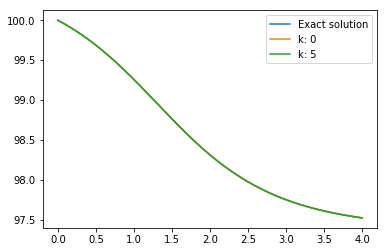

In [73]:
plt.figure()

true_value = exact_sol(t_list)
plt.plot(t_list, true_value, label='Exact solution')

for i, h in enumerate([h_list[0], h_list[-1]]):
    t, w = Explicit_trapezoid_method(f, a, b, h, y_0)
    plt.plot(t, w, label='k: %d' % (5*i))
    
plt.legend()
plt.show()

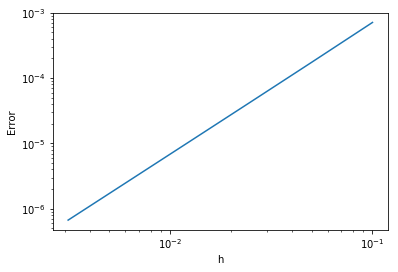

In [74]:
f_4 = exact_sol(4)
error_list = np.zeros(6)
for i, h in enumerate(h_list):
    t, w = Explicit_trapezoid_method(f, a, b, h, y_0)
    error_list[i] = abs(w[-1] - f_4)

plt.plot(h_list, error_list)
plt.xlabel('h')
plt.ylabel("Error")
plt.xscale("log")
plt.yscale("log")
plt.show()

### Q. 8

In [75]:
h_list = [0.1 * 2**(-k) for k in range(6)]
t_list = np.arange(a, b+h_list[-1], h_list[-1])

def f(t, y):
    return sinh(y)

In [76]:
# (a)
a, b = 0, 2
y_0 = 1/4

def exact_sol(t):
    return 2*arctanh(exp(t)*tanh(y_0/2))

C:\Users\snuist\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arctanh
  


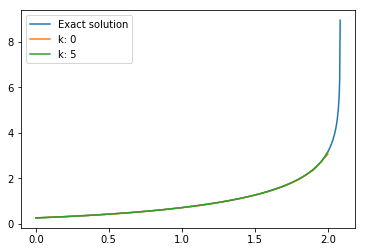

In [77]:
plt.figure()

true_value = exact_sol(t_list)
plt.plot(t_list, true_value, label='Exact solution')

for i, h in enumerate([h_list[0], h_list[-1]]):
    t, w = Explicit_trapezoid_method(f, a, b, h, y_0)
    plt.plot(t, w, label='k: %d' % (5*i))
    
plt.legend()
plt.show()

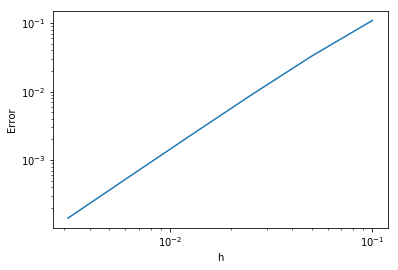

In [78]:
f_2 = exact_sol(2)
error_list = np.zeros(6)
for i, h in enumerate(h_list):
    t, w = Explicit_trapezoid_method(f, a, b, h, y_0)
    error_list[i] = abs(w[-1] - f_2)

plt.plot(h_list, error_list)
plt.xlabel('h')
plt.ylabel("Error")
plt.xscale("log")
plt.yscale("log")
plt.show()

In [79]:
# (b)
a, b = 0, 1/4
y_0 = 2

def exact_sol(t):
    return 2*arctanh(exp(t)*tanh(y_0/2))

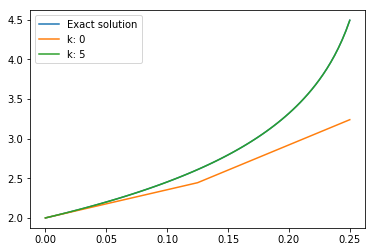

In [80]:
plt.figure()

true_value = exact_sol(t_list[:81])
plt.plot(t_list[:81], true_value, label='Exact solution')

for i, h in enumerate([h_list[0], h_list[-1]]):
    t, w = Explicit_trapezoid_method(f, a, b, h, y_0)
    plt.plot(t, w, label='k: %d' % (5*i))
    
plt.legend()
plt.show()

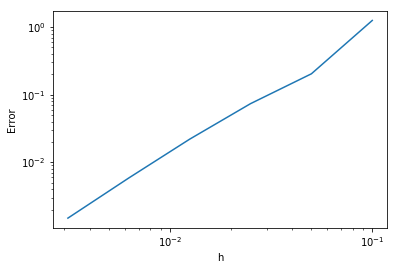

In [81]:
f_025 = exact_sol(1/4)
error_list = np.zeros(6)
for i, h in enumerate(h_list):
    t, w = Explicit_trapezoid_method(f, a, b, h, y_0)
    error_list[i] = abs(w[-1] - f_025)

plt.plot(h_list, error_list)
plt.xlabel('h')
plt.ylabel("Error")
plt.xscale("log")
plt.yscale("log")
plt.show()